In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
tf.random.set_seed(42)
np.random.seed(42)

In [2]:
china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255
images = np.array([china,flower])
batch_size, height, width,channel = images.shape

In [3]:
filter = np.zeros(shape = (7,7,channel,2), dtype=np.float32)

In [4]:
filter[:,3,:,0] = 1 # vertical filter
filter[3,:,:,1] = 1 # horizontal filter

In [5]:
print(filter[:,:,0,0])

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [6]:
print(filter[:,:,0,1])

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [7]:
filter.shape

(7, 7, 3, 2)

Text(0.5, 1.0, 'Horizontal Filter')

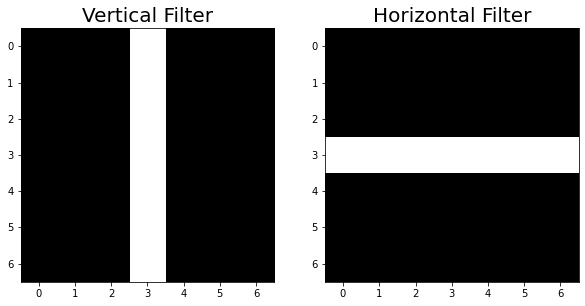

In [8]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(filter[:,:,0,0], cmap = 'gray')
plt.title('Vertical Filter',size = 20)
plt.subplot(1,2,2)
plt.imshow(filter[:,:,0,1], cmap = 'gray')
plt.title('Horizontal Filter', size = 20)

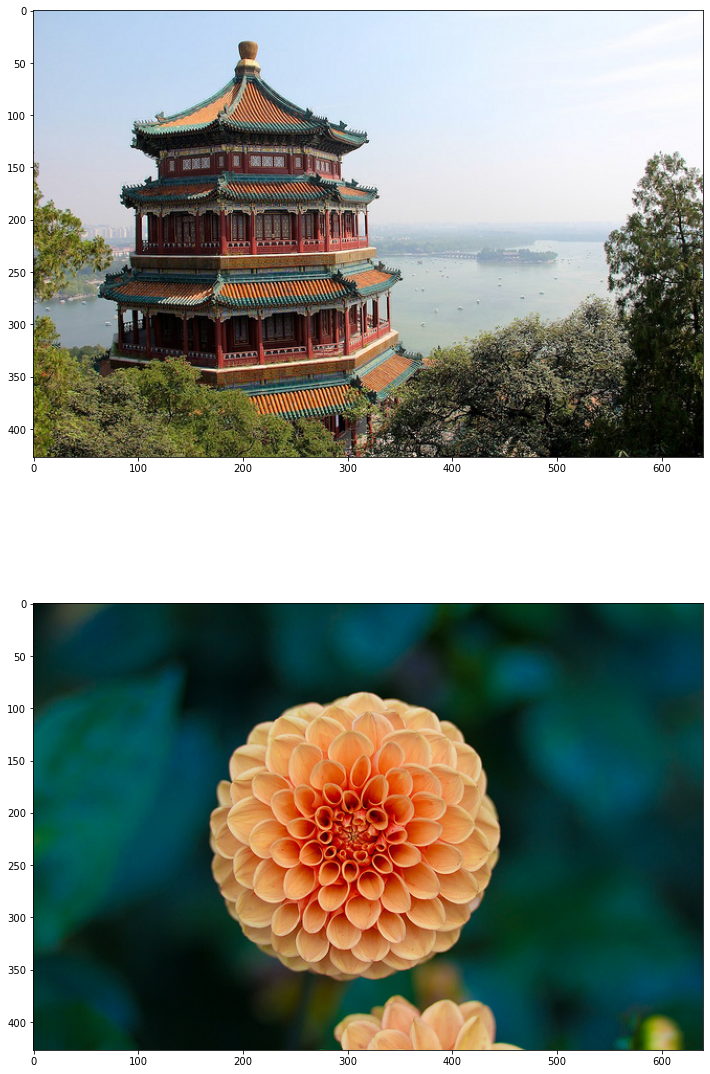

In [9]:
plt.figure(figsize = (12,20))
plt.subplot(2,1,1)
plt.imshow(china)

plt.subplot(2,1,2)
plt.imshow(flower)
plt.show()

In [40]:
max_pool = tf.keras.layers.MaxPool2D((2,2),strides = (2,2), padding='valid')
outputs_ = max_pool(images)

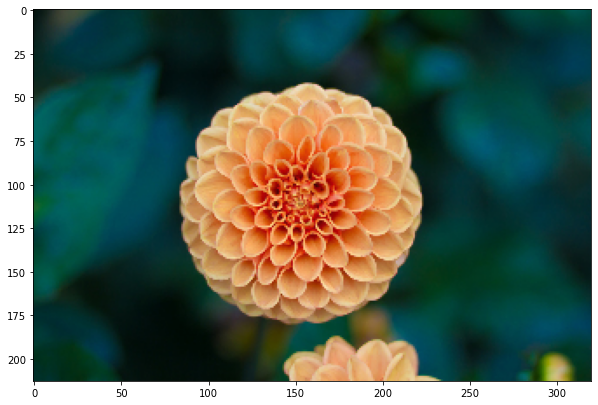

In [41]:
plt.figure(figsize = (10,10))           # without strides
plt.imshow(outputs_[1])
plt.show()

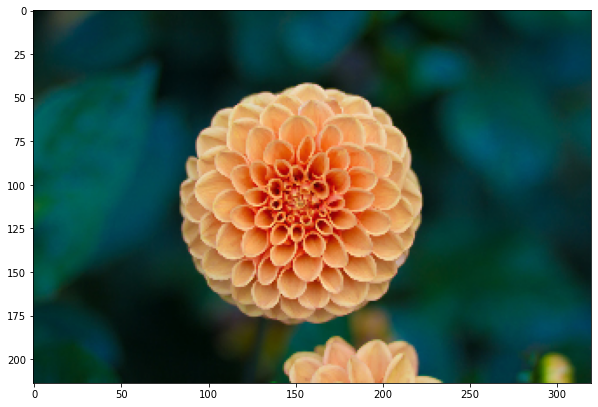

In [39]:
plt.figure(figsize = (10,10))           # with strides
plt.imshow(outputs_[1])
plt.show()

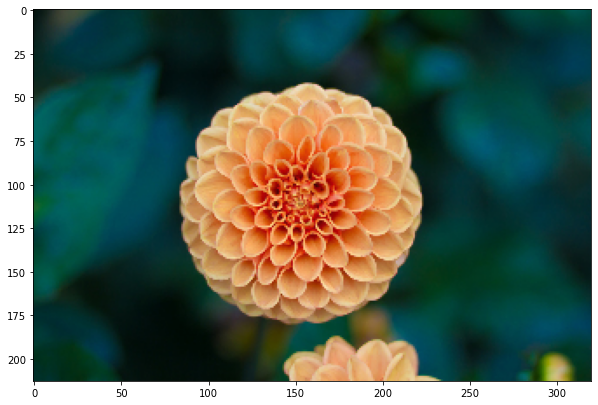

In [42]:
avg_pool = keras.layers.AvgPool2D((2,2),strides = None, padding = 'valid')
plt.figure(figsize = (10,10))           # with strides
plt.imshow(outputs_[1])
plt.show()

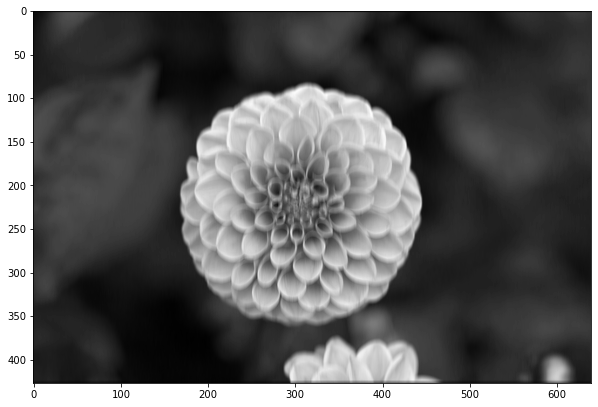

In [15]:
outputs = tf.nn.conv2d(images, filter, strides=1, padding='SAME')
plt.figure(figsize=(10,10))
plt.imshow(outputs[1,:,:,0],cmap = 'gray')

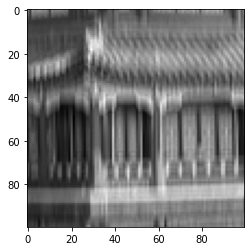

In [11]:
plt.imshow(outputs[0,150:250,150:250,0],cmap = 'gray')

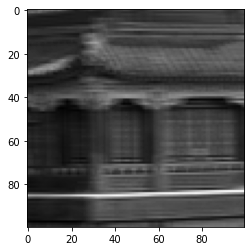

In [12]:
plt.imshow(outputs[0,150:250,150:250,1],cmap = 'gray')